In [4]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 12

Remember the format for all of these is N, n, M, sigma 

In [5]:
Ns = np.loadtxt("N_sweep_results.txt", delimiter="\t")
Ms = np.loadtxt("M_sweep_results.txt", delimiter="\t")
ns = np.loadtxt("little_n_sweep_results.txt", delimiter="\t")
sigmas = np.loadtxt("sigma_sweep_results.txt", delimiter="\t")

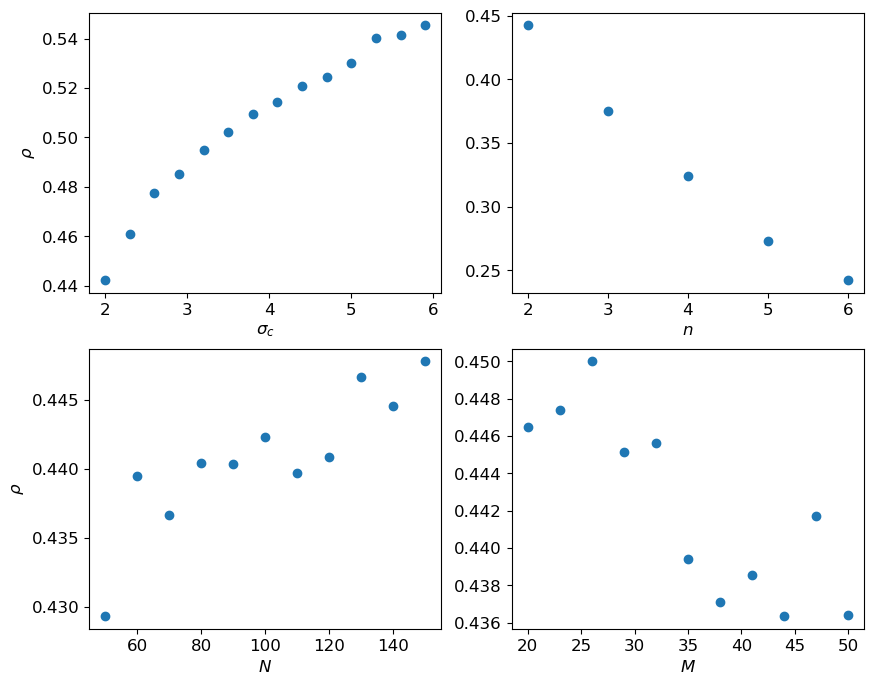

In [6]:
def plot_figure_3(sigmas, ns, Ns, Ms): 
    fig, axs = plt.subplots(2, 2, figsize=(10, 8))
    axs[0, 0].scatter(sigmas[:, 3], sigmas[:, -1])
    axs[0, 0].set_xlabel(r'$\sigma_c$')
    axs[0, 0].set_ylabel(r'$\rho$')
    axs[0, 1].scatter(ns[:, 1], ns[:, -1]) 
    axs[0, 1].set_xlabel('$n$')
    axs[1, 0].scatter(Ns[:, 0], Ns[:, -1])
    axs[1, 0].set_xlabel('$N$')
    axs[1, 0].set_ylabel(r'$\rho$')
    axs[1, 1].scatter(Ms[:, 2], Ms[:, -1])
    axs[1, 1].set_xlabel('$M$')
    plt.savefig('figure3.png') 
    return fig

fig = plot_figure_3(sigmas, ns, Ns, Ms) 

A more nuanced version of this would allow us to vary our threshold for sparsity. Let's load in the W matrices directly and compute rho, then produce the plot

In [61]:
from canonical_model_jax import *
from glob import glob
import re
import os 
import matplotlib as 

In [3]:
rho_vectorized = jax.vmap(lambda x: compute_rho(x, tol=1e-10), in_axes=0)

In [106]:
def compute_rho_across_sweep(param, tol=1e-5):
    dir = os.path.dirname(glob(f'{param}_sweep/*')[0]) 
    param_files = [os.path.basename(sf) for sf in glob(f'{param}_sweep/*') if 'N_' in sf]
    param_rho = np.zeros((len(param_files), 2))
    for i, sf in enumerate(param_files): 
        pattern = '(?<=' + re.escape(param) + '_)[^_]*'
        param_value = re.search(pattern, sf).group(0)
        final_W = np.load(os.path.join(dir, sf))[-1]
        rho = compute_rho(final_W, tol=tol)
        param_rho[i] = [param_value, rho]
    return param_rho
        

In [107]:
tols = np.logspace(-16, -1, 16)

NameError: name 'matplotlib' is not defined

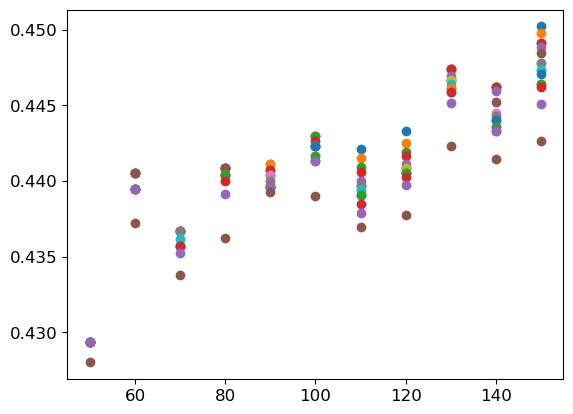

In [108]:
fig, ax = plt.subplots()
for tol in tols: 
    Ns = compute_rho_across_sweep('N', tol)
    ax.scatter(Ns[:, 0], Ns[:, 1]) 

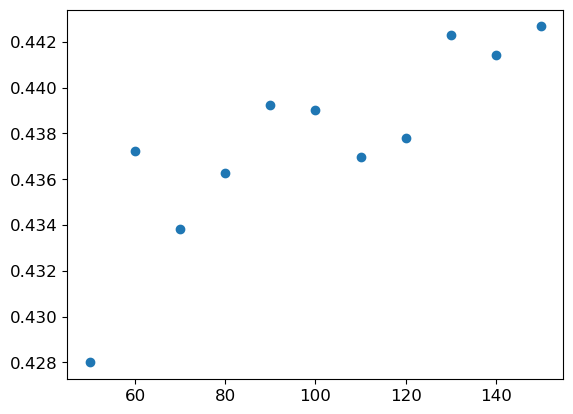

In [101]:
plt.scatter(Ns[:, 0], Ns[:, 1])